In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [157]:
#1.LIST: BIG PLANET LIST FROM PLANET S WITH RIGHT COLUMNS

In [158]:
#raw.rdb downloaded from DACE planetS catalog
#12.11.2024

In [159]:
table_file = '/Users/kasperer/Desktop/Dissertation-/DACE_export/raw.rdb'
big_planet_list_all = pd.read_csv(table_file, sep='\t') 

#choose columns
columns = ['planet_name', 'period',
                   'planet_mass', 'planet_radius', 
                   'planet_mass_rel_err', 'planet_radius_rel_err',
                   'stellar_eff_temp','gaia_dr3_id', 'stellar_surface_gravity','stellar_metallicity',
                   'stellar_metallicity_upper', 'stellar_metallicity_lower', 'stellar_metallicity_ratio'
                   ] #'teff_gaia_dr3'

big_planet_list = big_planet_list_all[columns]

#print(df_filtered)
#print(df) #whole list
#print(df.columns.tolist()) #list of columns

In [160]:
columns_list = list(big_planet_list.columns)
print(columns_list)

['planet_name', 'period', 'planet_mass', 'planet_radius', 'planet_mass_rel_err', 'planet_radius_rel_err', 'stellar_eff_temp', 'gaia_dr3_id', 'stellar_surface_gravity', 'stellar_metallicity', 'stellar_metallicity_upper', 'stellar_metallicity_lower', 'stellar_metallicity_ratio']


In [161]:
#count how many planets are in initial list 
df_rowcut = big_planet_list.iloc[3:] 
row_count = df_rowcut.shape[0]  

print("Number of planets in inital planetS list:", row_count)

#count how many stars are in initial list
star_count = big_planet_list['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 765 PLANETS (inital planetS list):",star_count)

Number of planets in inital planetS list: 765
STAR COUNT FOR 765 PLANETS (inital planetS list): 698


In [162]:
#save as csv
path = '/Users/kasperer/Desktop/Thesis/big_planet_list_141024'
big_planet_list.to_csv(path, index=False)

In [163]:
print(big_planet_list)

     planet_name      period    planet_mass  planet_radius  \
0           Name           P  M<sub>p</sub>  R<sub>p</sub>   
1              -         DAY    JUPITERMASS  JUPITERRADIUS   
2    -----------      ------    -----------  -------------   
3       55 Cnc e   0.7365474        0.02514          0.167   
4      CoRoT-1 b   1.5089557           1.03           1.49   
..           ...         ...            ...            ...   
763       XO-3 b  3.19153285           11.7          1.217   
764       XO-4 b   4.1250823          1.612           1.34   
765       XO-5 b  4.18775581          1.046          1.109   
766       XO-7 b   2.8641424          0.709          1.373   
767     pi Men c    6.267852         0.0135         0.1882   

     planet_mass_rel_err  planet_radius_rel_err  stellar_eff_temp  \
0    Relative Mass Error  Relative Radius Error   T<sub>eff</sub>   
1                      -                      -            KELVIN   
2    -------------------  --------------------- 

In [164]:
#2. SMALL PLANET LIST

In [165]:
#FILTER BY THESE CRITERIA
#radius < 2 Re 
#Teff > 4000 K --> same unit

In [166]:
#cut the first 3 rows because they are only the headers of the columns
big_planet_list_numbers = big_planet_list.iloc[3:]

In [167]:
big_planet_list_numbers['planet_radius'] = pd.to_numeric(big_planet_list_numbers['planet_radius'])
big_planet_list_numbers['stellar_eff_temp'] = pd.to_numeric(big_planet_list_numbers['stellar_eff_temp'])
big_planet_list_numbers['planet_mass'] = pd.to_numeric(big_planet_list_numbers['planet_mass'])
big_planet_list_numbers['stellar_surface_gravity'] = pd.to_numeric(big_planet_list_numbers['stellar_surface_gravity'])
big_planet_list_numbers['stellar_metallicity'] = pd.to_numeric(big_planet_list_numbers['stellar_metallicity'])
big_planet_list_numbers['stellar_metallicity_upper'] = pd.to_numeric(big_planet_list_numbers['stellar_metallicity_upper'])


/var/folders/2x/jt01c38n3ybgl1tttphvrwhr0000gn/T/ipykernel_4424/325181509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_planet_list_numbers['planet_radius'] = pd.to_numeric(big_planet_list_numbers['planet_radius'])
/var/folders/2x/jt01c38n3ybgl1tttphvrwhr0000gn/T/ipykernel_4424/325181509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_planet_list_numbers['stellar_eff_temp'] = pd.to_numeric(big_planet_list_numbers['stellar_eff_temp'])
/var/folders/2x/jt01c38n3ybgl1tttphvrwhr0000gn/T/ipykern

In [168]:
#3 FILTER LIST: mass, radius, teff

In [169]:
jup_to_earth_r = 11.209
jup_to_earth_m = 317.83

earth_to_jup_r = 1/11.209
earth_to_jup_m = 1/317.83

In [170]:
mass_filter = 10 * earth_to_jup_m
radius_filter = 2 * earth_to_jup_r
teff_filter = 4000 #K

planet_list_mass = big_planet_list_numbers[(big_planet_list_numbers['planet_mass'] <= mass_filter) &
    (big_planet_list_numbers['planet_radius'] <= radius_filter) 
    & (big_planet_list_numbers['stellar_eff_temp'] >= teff_filter)]

#print(planet_list_mass)
print(len(planet_list_mass))

51


In [171]:
#2 FILTER LIST: radius, teff

In [172]:
radius_filter = 2 * earth_to_jup_r
teff_filter = 4000 #K

planet_list = big_planet_list_numbers[
    (big_planet_list_numbers['planet_radius'] <= radius_filter) 
    & (big_planet_list_numbers['stellar_eff_temp'] >= teff_filter)]

print(planet_list)

          planet_name      period  planet_mass  planet_radius  \
3            55 Cnc e   0.7365474      0.02514          0.167   
23          CoRoT-7 b      0.8535      0.01905          0.136   
26   EPIC 220674823 b    0.571292      0.02583          0.154   
28   EPIC 249893012 b      3.5951      0.02753          0.174   
43          GJ 9827 b    1.208974      0.01347          0.128   
45          GJ 9827 c    3.648103      0.00585          0.101   
46          GJ 9827 d    6.201812      0.00950          0.169   
163          K2-229 b    0.584249      0.00815          0.104   
164       HD 136352 b    11.57797      0.01485          0.148   
167       HD 137496 b     1.62116      0.01271          0.117   
171        HD 15337 b     4.75642      0.02265          0.152   
180        HD 20329 b    0.926118      0.02335          0.153   
183       HD 213885 b    1.008035      0.02778          0.156   
184       HD 219134 b    3.092926      0.01491          0.143   
185       HD 219134 c    

In [173]:
#save small planet list as csv.file
path = '/Users/kasperer/Desktop/Thesis/planets_list'
planet_list.to_csv(path, index=False)

path = '/Users/kasperer/Desktop/Thesis/planets_list_mass'
planet_list_mass.to_csv(path, index=False)


In [174]:
print(len(planet_list))
print(len(planet_list_mass))
print(radius_filter)

52
51
0.1784280488892854


In [175]:
#count how many planets are in filtered planet list
row_count1 = planet_list.shape[0]  

print("Number of planets in filtered planet list:", row_count1)

#count how many stars are in initial list
star_count1 = planet_list['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 55 PLANETS (filtered planet list):",star_count1)

Number of planets in filtered planet list: 52
STAR COUNT FOR 55 PLANETS (filtered planet list): 47


In [176]:
#the one planet that is not included if i do 3 filters

In [177]:
diff1 = pd.concat([planet_list, planet_list_mass]).drop_duplicates(keep=False)

print(diff1)

    planet_name      period  planet_mass  planet_radius planet_mass_rel_err  \
446  TOI-1347 b  0.84742346      0.03492          0.161   0.108247422680412   

    planet_radius_rel_err  stellar_eff_temp          gaia_dr3_id  \
446    0.0559006211180124            5464.0  2265406171296997888   

     stellar_surface_gravity  stellar_metallicity  stellar_metallicity_upper  \
446                     4.64                 0.04                       0.06   

    stellar_metallicity_lower stellar_metallicity_ratio  
446                      0.06                    [Fe/H]  


In [178]:
#read out all the information from the list for the plots
#52
mass = planet_list['planet_mass']
radius = planet_list['planet_radius']
teff = planet_list['stellar_eff_temp']

stellar_surface_g = planet_list['stellar_surface_gravity']
stellar_metallicity = planet_list['stellar_metallicity']

#765
mass_all = big_planet_list_numbers['planet_mass']
radius_all = big_planet_list_numbers['planet_radius']
teff_all = big_planet_list_numbers['stellar_eff_temp']

stellar_surface_g_all = big_planet_list_numbers['stellar_surface_gravity']
stellar_metallicity_all = big_planet_list_numbers['stellar_metallicity']

In [179]:
mass_err = planet_list['planet_mass_rel_err']
radius_err = planet_list['planet_radius_rel_err']

In [180]:
#PLOT: mass radius

In [181]:
#mass range 0.00103 till 27.23
#radius range 0.062 till 1.986

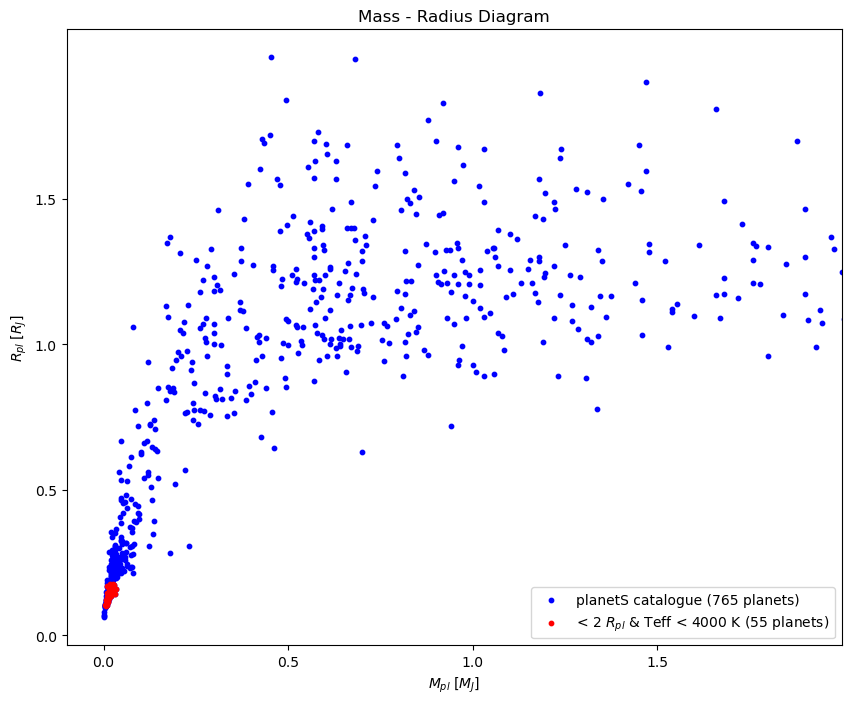

<Figure size 640x480 with 0 Axes>

In [182]:
plt.figure(figsize=(10,8))
plt.title('Mass - Radius Diagram')
plt.scatter(mass_all,radius_all,color='b', s=10,label='planetS catalogue (765 planets)')
plt.scatter(mass,radius,color='r', s=10,label='< 2 $R_{pl}$ & Teff < 4000 K (55 planets)')
plt.yticks(np.arange(0, 2.0, 0.5))
plt.xticks(np.arange(0, 2, 0.5))
plt.xlabel(r'$M_{pl} \; [M_{J}]$')
plt.ylabel(r'$R_{pl} \; [R_{J}]$')
plt.xlim(-0.1,2)
plt.legend()
plt.show()
plt.savefig('mass_radius_diagram.pdf', format='pdf')

In [183]:
#radius under 2 Re

#units are in jupiter in list --> units should be in earth in plot

jup_to_earth_r = 11.209
jup_to_earth_m = 317.83

#radius and mass of 765 planets (big_planet_list)
radius_earth_all = radius_all * jup_to_earth_r #radius J in radius earth
mass_earth_all = mass_all * jup_to_earth_m

#radius and mass of 1 FILTER LIST (only R filter)
under_two_mask = radius_earth_all < 2
under_two = radius_earth_all[under_two_mask]
under_two_mass = (big_planet_list_numbers['planet_mass'][under_two_mask]) * jup_to_earth_m #mass to plot

#radius and mass of 2 FILTER LIST (planet_list)
mass_earth = mass * jup_to_earth_m
radius_earth = radius * jup_to_earth_r

#print(len(radius_earth))
print("how many have radius < 2:", len(under_two))
#print(len(under_two_mass))
#print(under_two_mass)

how many have radius < 2: 89


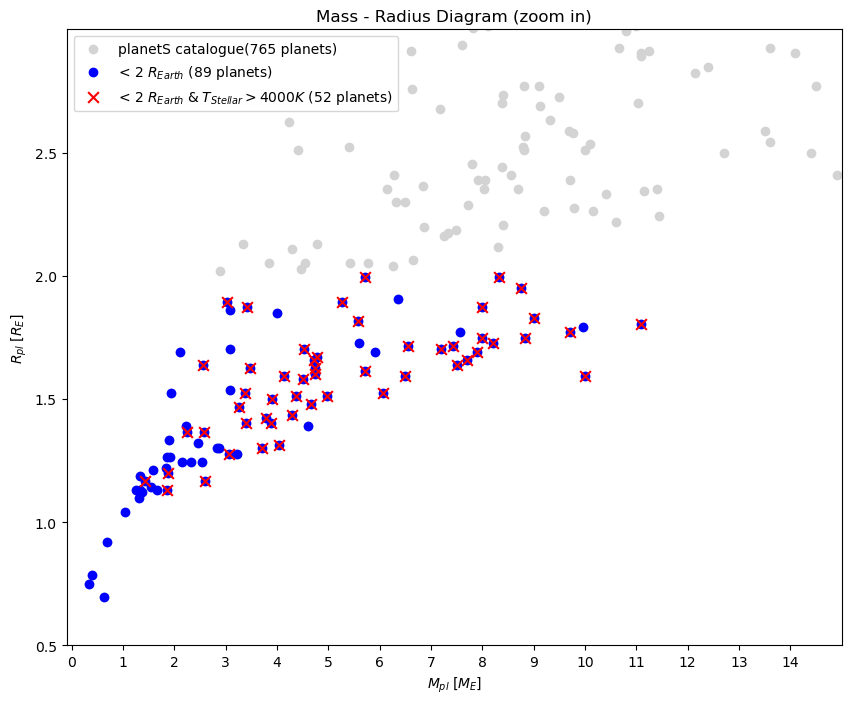

In [184]:
plt.figure(figsize=(10,8))
plt.title('Mass - Radius Diagram (zoom in)')

plt.scatter(mass_earth_all,radius_earth_all,color='lightgrey',label='planetS catalogue' +f'({len(mass_earth_all)} planets)')
#plt.scatter(under_two_mass, under_two, facecolors='none', edgecolors='r',s=70,label= '< 2 $R_{Earth}$ '+f'({len(under_two_mass)} planets)')
plt.scatter(under_two_mass, under_two, color='blue',label= '< 2 $R_{Earth}$ '+f'({len(under_two_mass)} planets)')
plt.scatter(mass_earth,radius_earth,color='red',marker='x',s=60,label='< 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ ' +f'({len(mass_earth)} planets)')

plt.yticks(np.arange(0, 3, 0.5))
plt.xticks(np.arange(0, 15, 1))
plt.xlabel(r'$M_{pl} \; [M_{E}]$')
plt.ylabel(r'$R_{pl} \; [R_{E}]$')
plt.ylim(0.5,3)
plt.xlim(-0.1,15)
plt.legend()
plt.savefig('/Users/kasperer/Desktop/Thesis/mass_radius_diagram_zoom.pdf', format='pdf')
plt.show()

In [185]:
#stellar plots

In [186]:
star_count = big_planet_list['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 765 PLANETS:",star_count)

star_count_1 = planet_list['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 55 PLANETS:", star_count_1)


STAR COUNT FOR 765 PLANETS: 698
STAR COUNT FOR 55 PLANETS: 47


In [187]:

#mask for stars over 4000 K
upper_teff_mask = teff_all > 4000

upper_teff = teff_all[upper_teff_mask]

upper_teff_g = (big_planet_list_numbers['stellar_surface_gravity'][upper_teff_mask])
upper_teff_metalicity = (big_planet_list_numbers['stellar_metallicity'][upper_teff_mask])
upper_teff_id = (big_planet_list_numbers['gaia_dr3_id'][upper_teff_mask])

star_count33 = (big_planet_list_numbers['gaia_dr3_id'][upper_teff_mask]).nunique()
print("how many individual stars have over 4000 K:",star_count33)



log_teff = np.log(teff_all) 

how many individual stars have over 4000 K: 636


In [188]:
print('CALCULATION HOW MANY STARS WILL BE DISPLAYING IN THE STELLAR PLOT')

nan = stellar_surface_g_all.isna().sum()
print('big inital list (765 planets): 698 stars')
print("how many are nan in log g:", nan)
print("how many are left from the 645 individual stars:", 698 - nan)

nan2 = upper_teff_g.isna().sum()
print('1 filter list: (teff): 636')
print("how many are nan in log g in teff cut list:",nan2)
print("how many are left from the 593 individual stars:",636 - nan2)

nan1 = stellar_surface_g.isna().sum()
print('2 filter list (teff + R (planet_list)): 50 stars')
print("how many are nan in log g in small list:",nan1)
print("how many are left from the 46 individual stars:",50 - nan1)


#nan3 = stellar_surface_g_spectra.isna().sum()
#print('spectra in ESPRESSO: 27 stars')
#print("how many are nan in log g in small list:",nan3)
#print("how many are left from the 50 individual stars:",27- nan3)

CALCULATION HOW MANY STARS WILL BE DISPLAYING IN THE STELLAR PLOT
big inital list (765 planets): 698 stars
how many are nan in log g: 164
how many are left from the 645 individual stars: 534
1 filter list: (teff): 636
how many are nan in log g in teff cut list: 154
how many are left from the 593 individual stars: 482
2 filter list (teff + R (planet_list)): 50 stars
how many are nan in log g in small list: 18
how many are left from the 46 individual stars: 32


In [189]:
single_occurrence_count = upper_teff_id.value_counts()[upper_teff_id.value_counts() == 1].count()
print(single_occurrence_count)

593


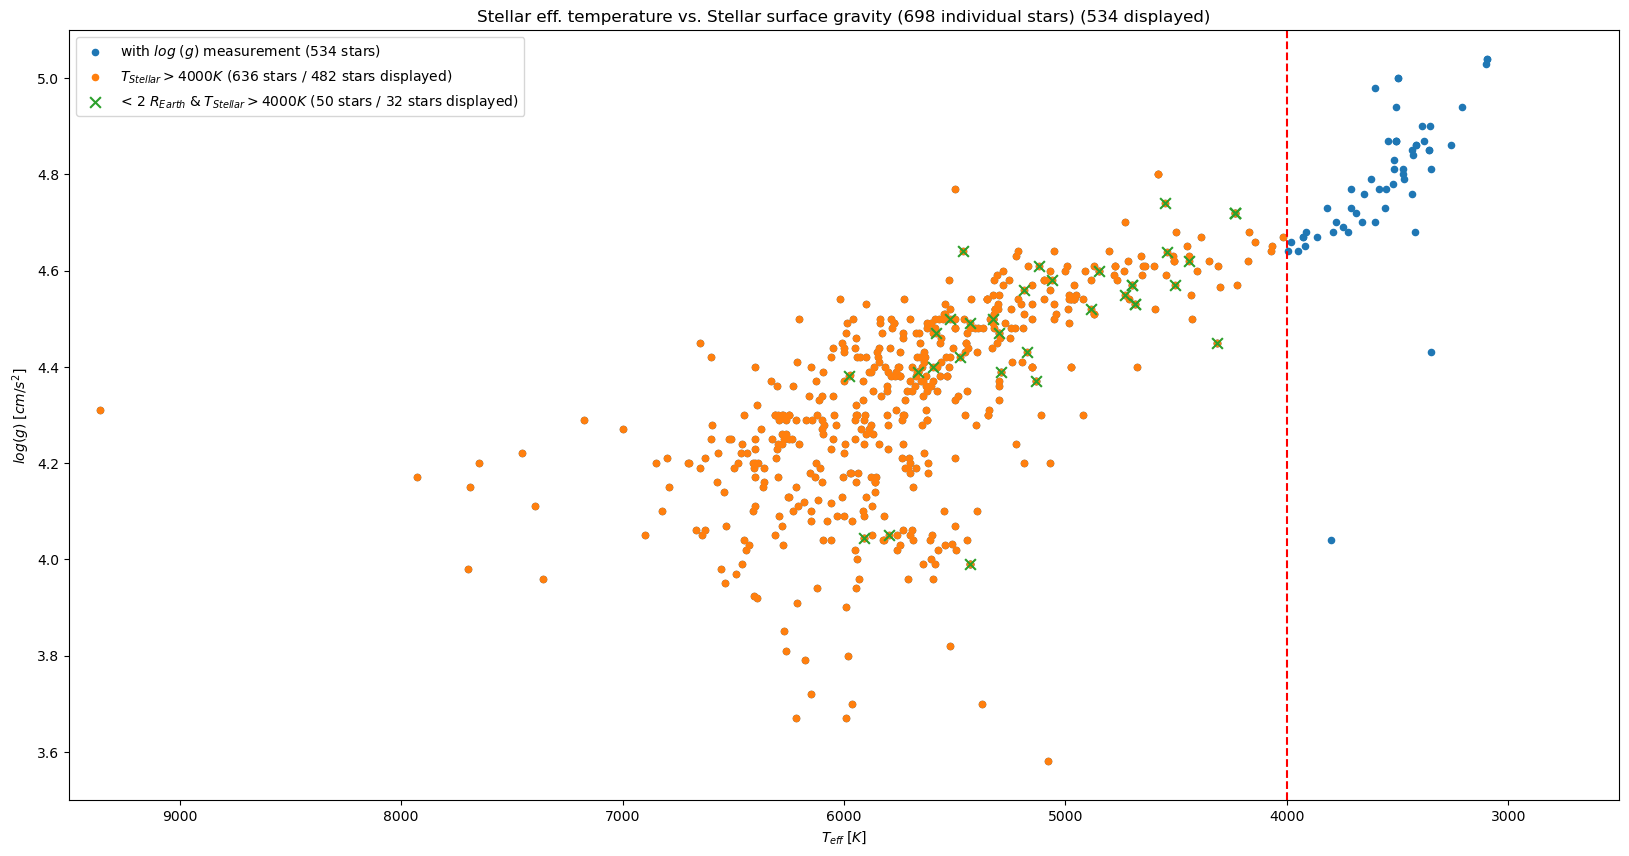

In [190]:
plt.figure(figsize=(20,10))
plt.title('Stellar eff. temperature vs. Stellar surface gravity (698 individual stars) (534 displayed)')
plt.scatter(teff_all, stellar_surface_g_all, s=20, label='with $log\; (g)$ measurement (534 stars)')
#plt.scatter(under_teff, under_teff_g, facecolors='none', edgecolors='r',s=80, label='$T_{Stellar} < 4000 K$ (690stars)')
plt.scatter(upper_teff,upper_teff_g,s=20,label='$T_{Stellar} > 4000 K$ (636 stars / 482 stars displayed)')
plt.scatter(teff,stellar_surface_g,s=60, marker ='x',label='< 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ (50 stars / 32 stars displayed)')
plt.ylabel(r'$log(g) \; [cm / s^{2}]$')
plt.xlabel(r'$T_{eff} \; [K]$')
plt.xticks(np.arange(2000, 10000.0, 1000))
plt.ylim(3.5,5.1)
plt.xlim(2500,9500)
plt.gca().invert_xaxis() 
plt.axvline(4000,linestyle='--',color='r')
plt.legend()
plt.savefig('/Users/kasperer/Desktop/Thesis/stellar_teff_logg.pdf', format='pdf')
plt.show()

In [191]:
#3.List

In [192]:
#crossfit the planet_list with the ESPRESSO spectra archive

In [193]:
#FIRST: make a table only with GAIA DR3 ID to put into the ESO Archive

In [194]:
columns = ['gaia_dr3_id'] 
dr3 = planet_list[columns]
print(len(dr3)) #this is a table of all the stars ID in planet_list


52


In [195]:
#add GAIA DR3 to every row

In [196]:
def prepend_gaia(entry):
    return f"GAIA DR3 {entry}"

dr3_modified = dr3.applymap(prepend_gaia)

output_file = 'dr3.txt'
with open(output_file, 'w') as f:
    for index, row in dr3_modified.iterrows():
        f.write('\t'.join(row) + '\n')

print(f"Data written to {output_file}")

Data written to dr3.txt


In [197]:
#put into ESPRESSO data set 

In [198]:
#--> spectra.txt with info on which spectras exist (BUT JUST THE COPIED TEXT)

In [199]:
import re

In [200]:
#read only GAIA DR3 ID and Number of spectra out of the sentences

In [201]:
input_file = '/Users/kasperer/Desktop/Dissertation-/spectra.txt'   
output_file = '/Users/kasperer/Desktop/Dissertation-/spectra_clear.txt' 

pattern = r"(GAIA DR3 \d+).*?(\d+) records"


extracted_data = []

with open(input_file, 'r') as f:
    for line in f:
        match = re.search(pattern, line)
        if match:
            gaia_info = match.group(1)  # GAIA DR3 info
            spectra_count = match.group(2)  # Number of records
            extracted_data.append(f"{gaia_info} {spectra_count}")

with open(output_file, 'w') as f:
    for entry in extracted_data:
        f.write(entry + '\n')

print(f"Data extracted and written to {output_file}")

Data extracted and written to /Users/kasperer/Desktop/Dissertation-/spectra_clear.txt


In [202]:
#---> spectra_clear with two columns GAIA DR3 INFO and Number of spectra in text file

In [203]:
spectra_records = {}

spectra_clear = '/Users/kasperer/Desktop/Dissertation-/spectra_clear.txt'

with open(spectra_clear, 'r') as f:
    for line in f:
        parts = line.split() #split it
        if len(parts) >= 3:
            gaia_id = ' '.join(parts[2:3])  #1. column: ignore "GAIA DR3"
            spectra_count = int(parts[3])  #2. column: number for spectra
            spectra_records[gaia_id] = spectra_count 

In [204]:
#match GAIA DR3 column from planet list with GAIA DR3 from spectra_clear

In [205]:
spectras = list(spectra_records.items())
spectra_list = pd.DataFrame(spectras, columns=['gaia_dr3_id', 'Number of Spectra'])
#spectra list now has the stars ID and the number of spectra

In [206]:
planets_spectra = pd.merge(planet_list, spectra_list, on='gaia_dr3_id', how='inner')

In [207]:
#planets_spectra = still includes all planets even if there is no spectra
#planets_with_spectra = shows only planets that have a host star with a spectra in ESPRESSO

In [208]:
planets_with_spectra = planets_spectra[planets_spectra['Number of Spectra'] != 0]

#3 LIST: PLANETS WITH HOSTSTARS THAT HAVE SPECTRA IN ESO ARCHIVE
print(planets_with_spectra) 


         planet_name      period  planet_mass  planet_radius  \
0           55 Cnc e   0.7365474      0.02514          0.167   
1          CoRoT-7 b      0.8535      0.01905          0.136   
2   EPIC 220674823 b    0.571292      0.02583          0.154   
3   EPIC 249893012 b      3.5951      0.02753          0.174   
4          GJ 9827 b    1.208974      0.01347          0.128   
5          GJ 9827 c    3.648103      0.00585          0.101   
6          GJ 9827 d    6.201812      0.00950          0.169   
7           K2-229 b    0.584249      0.00815          0.104   
8        HD 136352 b    11.57797      0.01485          0.148   
9        HD 137496 b     1.62116      0.01271          0.117   
10        HD 15337 b     4.75642      0.02265          0.152   
11        HD 20329 b    0.926118      0.02335          0.153   
12       HD 213885 b    1.008035      0.02778          0.156   
15        HD 23472 b   17.667087      0.02618          0.178   
16        HD 23472 c    29.79749      0.

In [239]:
#count how many planets are in filtered planet list with spectra
row_count2 = planets_with_spectra.shape[0]  

print("Number of planets in filtered planet list with star spectra:", row_count2)

#count how many stars are in initial list
star_count2 = planets_with_spectra['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 32 PLANETS (filtered planet list):",star_count2)


Number of planets in filtered planet list with star spectra: 32
STAR COUNT FOR 32 PLANETS (filtered planet list): 29


In [210]:
path = '/Users/kasperer/Desktop/Thesis/planets_with_hoststar_spectra'
planets_with_spectra.to_csv(path, index=False)

#### STELLAR PLOTS WITH SPECTRA SHOWN

In [211]:
star_count_1 = big_planet_list['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 765 planets:", star_count_1)

star_count_1 = planet_list['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 55 planets:", star_count_1)

star_count_1 = planets_with_spectra['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 32 planets:", star_count_1)


STAR COUNT FOR 765 planets: 698
STAR COUNT FOR 55 planets: 47
STAR COUNT FOR 32 planets: 29


In [212]:
#stellar_surface_g_spectra = (planets_with_spectra['stellar_surface_gravity']).nunique()

#stellar log g with doubles
stellar_surface_g_spectra = planets_with_spectra['stellar_surface_gravity']

#stellar_surface_g_spectra_count = (planets_with_spectra['stellar_surface_gravity']).nunique()
#print("Of 29 stars with spectra in ESO:",stellar_surface_g_spectra_count, 'have a log g measurement')

#teff spectra with doubles
teff_spectra = planets_with_spectra['stellar_eff_temp']

#teff_up = planets_spectra_up['stellar_eff_temp']
#print(len(teff_up))

#stellar_surface_g_up = planets_spectra_up['stellar_surface_gravity']
#print(len(stellar_surface_g_up))


nan3 = stellar_surface_g_spectra.isna().sum()
print("out of 29 stars:",29 - nan3,"have a log g measurement")


out of 29 stars: 21 have a log g measurement


In [213]:
stars_logg_all = big_planet_list[big_planet_list['stellar_surface_gravity'].notna()]
star_count_1 = stars_logg_all['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 765 PLANETS WITH LOG G MEARUSEMENT:", star_count_1)

stars_upper_teff_g = big_planet_list[upper_teff_mask & big_planet_list['stellar_surface_gravity'].notna()]
star_count_2 = stars_upper_teff_g['gaia_dr3_id'].nunique()
print("STAR COUNT FOR > 4000 K WITH LOG G MEARUSEMENT:", star_count_2)

stars_logg = planet_list[planet_list['stellar_surface_gravity'].notna()]
star_count_3 = stars_logg['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 55 PLANETS WITH LOG G MEARUSEMENT:", star_count_3)

stars_logg_spectra = planets_with_spectra[planets_with_spectra['stellar_surface_gravity'].notna()]
star_count_4 = stars_logg_spectra['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 55 PLANETS WITH LOG G MEARUSEMENT AND STELLAR SPECTRA:", star_count_4)
print(len(stars_logg_spectra))

star_count_5 = planets_with_spectra['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 55 PLANETS WITH LOG G MEARUSEMENT AND STELLAR SPECTRA:", star_count_5)

STAR COUNT FOR 765 PLANETS WITH LOG G MEARUSEMENT: 550
STAR COUNT FOR > 4000 K WITH LOG G MEARUSEMENT: 495
STAR COUNT FOR 55 PLANETS WITH LOG G MEARUSEMENT: 30
STAR COUNT FOR 55 PLANETS WITH LOG G MEARUSEMENT AND STELLAR SPECTRA: 21
24
STAR COUNT FOR 55 PLANETS WITH LOG G MEARUSEMENT AND STELLAR SPECTRA: 29


In [238]:
len(planets_with_spectra)



#stars_logg_11 = planets_spectra_up[planets_spectra_up['stellar_surface_gravity'].notna()]
#star_count_6 = stars_logg_11['gaia_dr3_id'].nunique()
#star_count_6 = planets_spectra_up['gaia_dr3_id'].nunique()
#print(star_count_6)



32

In [215]:
print((stellar_surface_g_all.notna() == True).sum())
print((upper_teff_g.notna() == True).sum())
print((stellar_surface_g.notna() == True).sum())
print((stellar_surface_g_spectra.notna() == True).sum())

601
536
34
24


In [216]:
#print(stars_logg_spectra)
star_count_4 = stars_logg_spectra['gaia_dr3_id'].nunique()

print("COUNT OF UNIQUE GAIA DR3 IDs:", star_count_4)


COUNT OF UNIQUE GAIA DR3 IDs: 21


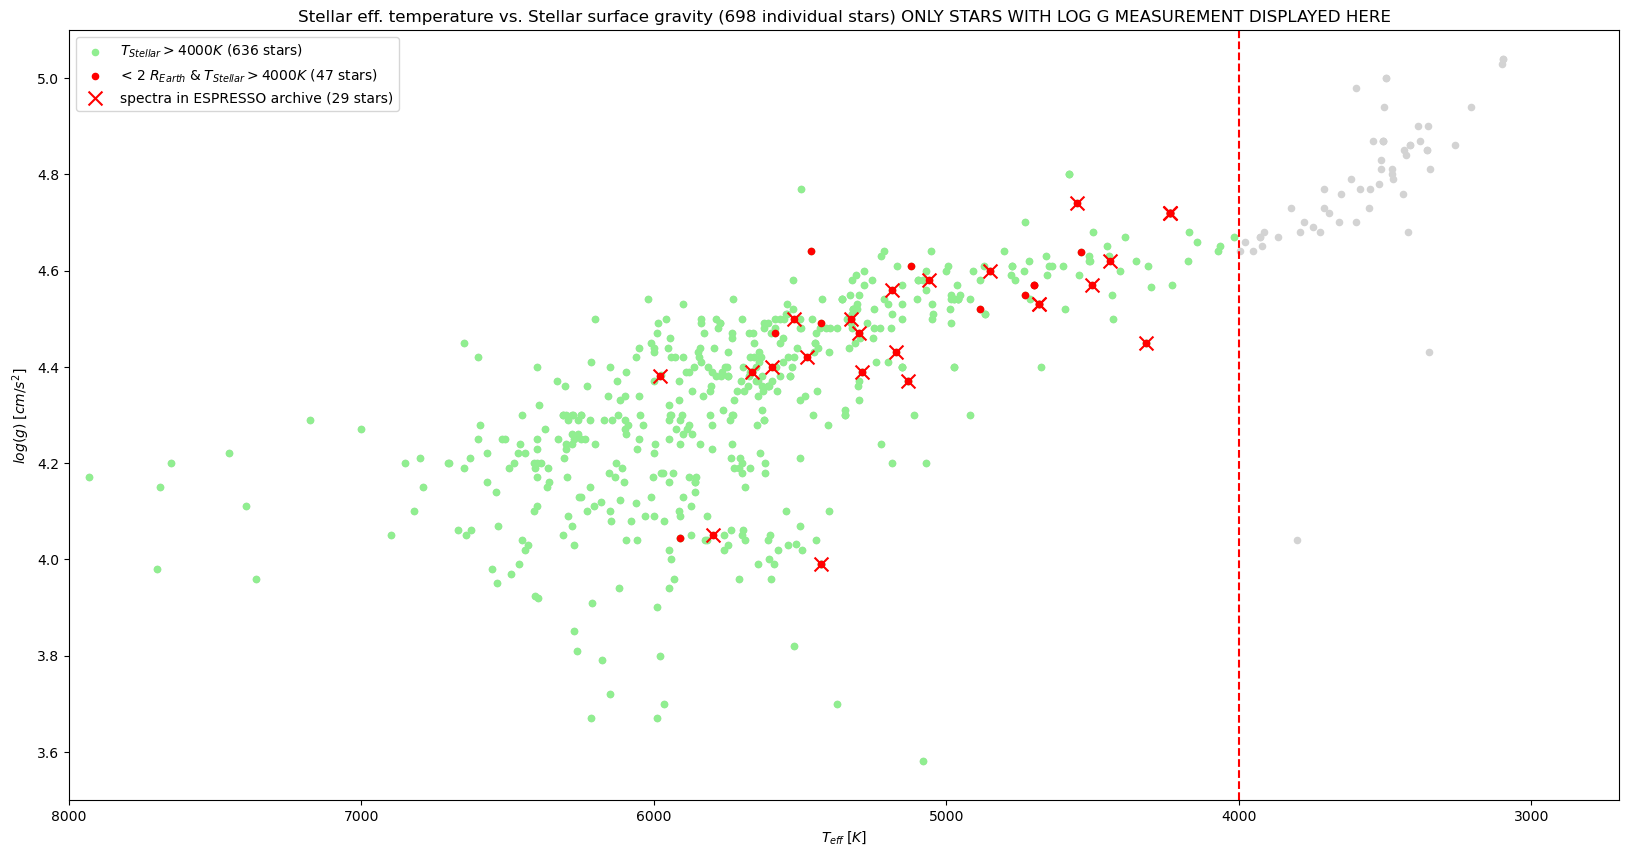

In [236]:
plt.figure(figsize=(20,10))
plt.title('Stellar eff. temperature vs. Stellar surface gravity (698 individual stars) ONLY STARS WITH LOG G MEASUREMENT DISPLAYED HERE')
plt.scatter(teff_all, stellar_surface_g_all, s=20, color='lightgrey')#label='with $log\; (g)$ measurement (550 stars)',color='lightgrey')
#plt.scatter(under_teff, under_teff_g, facecolors='none', edgecolors='r',s=80, label='$T_{Stellar} < 4000 K$ (690stars)')
plt.scatter(upper_teff,upper_teff_g,s=20,label='$T_{Stellar} > 4000 K$ (636 stars)',color='lightgreen')
plt.scatter(teff,stellar_surface_g,s=20, label='< 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ (47 stars)',color='r')
#plt.scatter(teff_spectra, stellar_surface_g_spectra,facecolors='none', edgecolors='r',s=90, label='spectra in ESPRESSO archive (21 stars)')
plt.scatter(teff_spectra, stellar_surface_g_spectra,marker='x',s=100, color='r',label='spectra in ESPRESSO archive (29 stars)')
#plt.scatter(teff_up,stellar_surface_g_up, marker='x', s=100, color='blue',label='UPFRONT stars (17 stars)')
plt.ylabel(r'$log(g) \; [cm / s^{2}]$')
plt.xlabel(r'$T_{eff} \; [K]$')
plt.xticks(np.arange(2000, 10000.0, 1000))
plt.ylim(3.5,5.1)
plt.xlim(2700,8000)
plt.gca().invert_xaxis() 
plt.axvline(4000,linestyle='--',color='r')
plt.legend()
plt.savefig('/Users/kasperer/Desktop/Thesis/stars.pdf', format='pdf')
plt.show()

In [218]:
#stellar metallcity plot

In [219]:
stellar_metallicity_spectra = planets_with_spectra['stellar_metallicity']
#stellar_metallicity_up = planets_spectra_up['stellar_metallicity']

In [220]:
stars_all = big_planet_list['gaia_dr3_id'].nunique()
print("STAR COUNT:", stars_all)#

stars_metal_all = big_planet_list[big_planet_list['stellar_metallicity'].notna()]
star_count_1 = stars_metal_all['gaia_dr3_id'].nunique()
print("STAR COUNT WITH FE / H MEARUSEMENT:", star_count_1)

stars_metal = planet_list[planet_list['stellar_metallicity'].notna()]
star_count_3 = stars_metal['gaia_dr3_id'].nunique()
print("STAR COUNT WITH FE / H AND 2 FILTERS:", star_count_3)

stars_metal_spectra = planets_with_spectra[planets_with_spectra['stellar_metallicity'].notna()]
star_count_4 = stars_metal_spectra['gaia_dr3_id'].nunique()
print("STAR COUNT WITH FE / H AND 2 FILTERS AND SPECTRA:", star_count_4)

#stars_metal_spectra_up = planets_spectra_up[planets_spectra_up['stellar_metallicity'].notna()]
#star_count_5 = stars_metal_spectra_up['gaia_dr3_id'].nunique()
#print("STAR COUNT WITH FE / H AND 2 FILTERS AND SPECTRA IN UPFRONT:", star_count_5)


STAR COUNT: 698
STAR COUNT WITH FE / H MEARUSEMENT: 650
STAR COUNT WITH FE / H AND 2 FILTERS: 42
STAR COUNT WITH FE / H AND 2 FILTERS AND SPECTRA: 27


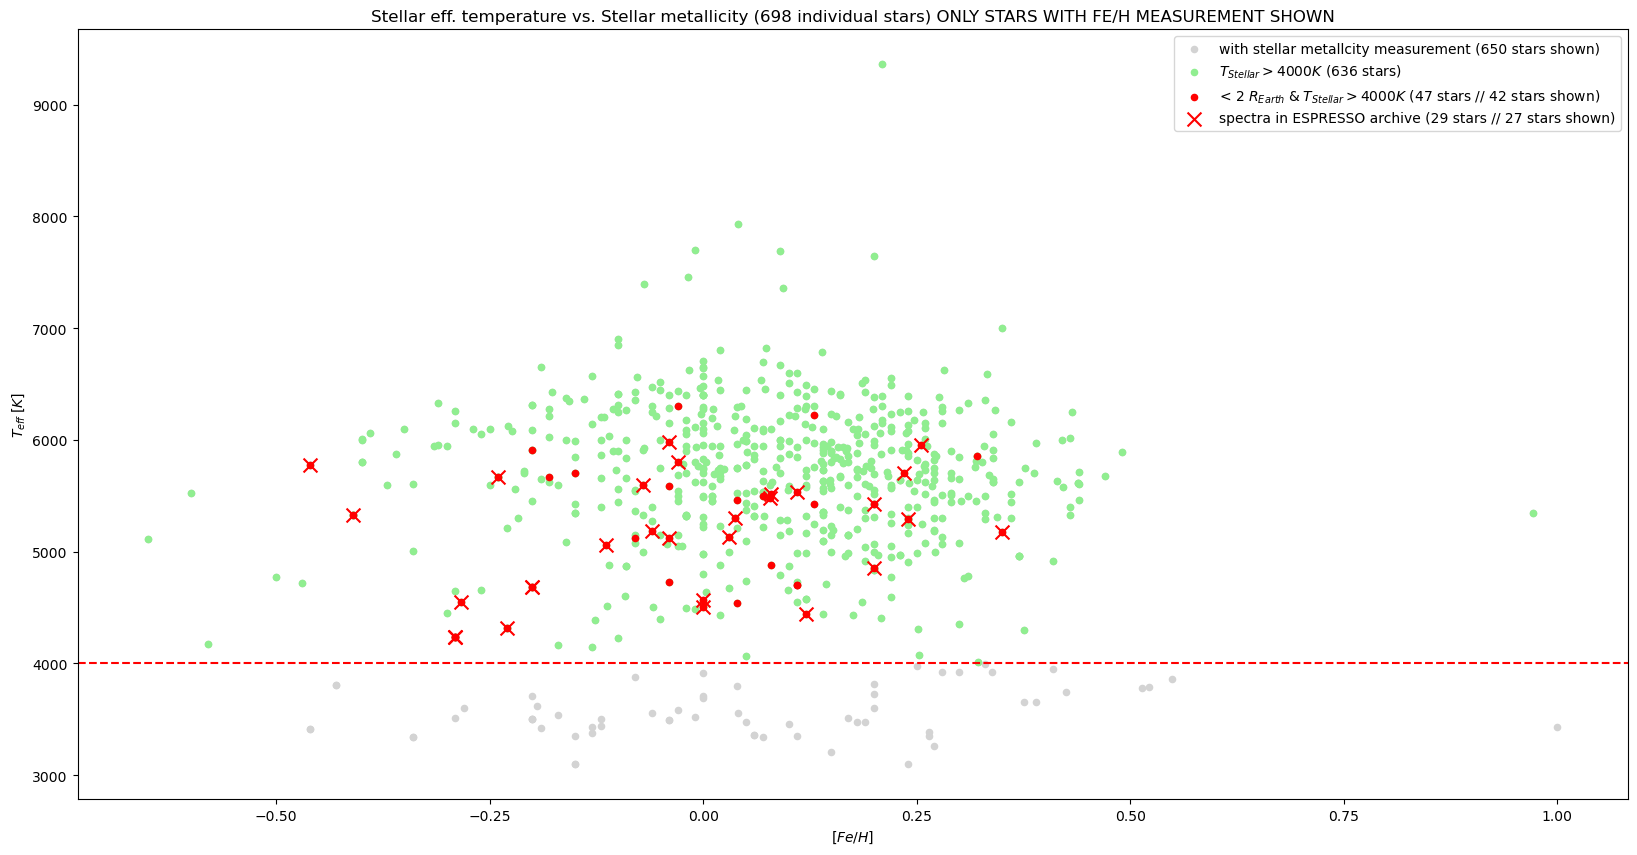

In [235]:
plt.figure(figsize=(20,10))
plt.title('Stellar eff. temperature vs. Stellar metallicity (698 individual stars) ONLY STARS WITH FE/H MEASUREMENT SHOWN')
plt.scatter(stellar_metallicity_all, teff_all,  s=20, label='with stellar metallcity measurement (650 stars shown)',color='lightgrey')
plt.scatter(upper_teff_metalicity,upper_teff,s=20,label='$T_{Stellar} > 4000 K$ (636 stars)',color='lightgreen')
plt.scatter(stellar_metallicity, teff, s=20, label='< 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ (47 stars // 42 stars shown)',color='r')
plt.scatter(stellar_metallicity_spectra, teff_spectra, marker='x',s=100, color='r',label='spectra in ESPRESSO archive (29 stars // 27 stars shown)')
#plt.scatter(stellar_metallicity_up, teff_up, marker='x',s=100, color='b',label='UPFRONT (23 stars)')

plt.xlabel(r'$[Fe / H]$')
plt.ylabel(r'$T_{eff} \; [K]$')
#plt.ylim(3000,8000)
plt.axhline(4000,linestyle='--',color='r')
plt.legend()
#plt.savefig('/Users/kasperer/Desktop/Thesis/stars_metallcity.pdf', format='pdf')
plt.show()

In [222]:
#check how many stars
#planets that fulfill the filter but are in the same system

In [223]:
star_count_5 = planets_with_spectra['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 32 PLANETS WITH STELLAR SPECTRA:", star_count_5)

STAR COUNT FOR 32 PLANETS WITH STELLAR SPECTRA: 29


In [224]:
sorted_by_stars = planets_with_spectra.sort_values(by='gaia_dr3_id')

sorted_by_stars['STAR'] = sorted_by_stars['gaia_dr3_id'].where(sorted_by_stars['gaia_dr3_id'].ne(sorted_by_stars['gaia_dr3_id'].shift()), 'SAME STAR AS ABOVE')

print(sorted_by_stars)

         planet_name      period  planet_mass  planet_radius  \
43         TOI-178 c     3.23845      0.01501          0.149   
45         TOI-238 b   1.2730991      0.01070          0.125   
17         HD 3167 b  0.95965428      0.01488          0.145   
23          K2-216 b      2.1748      0.02517          0.156   
2   EPIC 220674823 b    0.571292      0.02583          0.154   
24          K2-265 b    2.369172      0.02058          0.153   
51         WASP-47 e     0.78961      0.02832          0.163   
4          GJ 9827 b    1.208974      0.01347          0.128   
5          GJ 9827 c    3.648103      0.00585          0.101   
6          GJ 9827 d    6.201812      0.00950          0.169   
22          K2-141 b   0.2803244      0.01564          0.135   
46         TOI-431 b    0.490047      0.00966          0.114   
19       HIP 29442 c     3.53796      0.01416          0.141   
11        HD 20329 b    0.926118      0.02335          0.153   
1          CoRoT-7 b      0.8535      0.

In [225]:
path = '/Users/kasperer/Desktop/Thesis/planets_spectra_sortedbystars'
sorted_by_stars.to_csv(path, index=False)

In [226]:
#32 planets
#29 stars

### CROSSMATCH WITH 29 STARS FROM UPFRONT


In [76]:
from astropy.io import fits
import numpy as np

In [176]:
#GAIA DR3 ID FOR 29 STARS FROM BARBARA
gaia_ids = pd.read_csv('/Users/kasperer/Desktop/Dissertation-/gaia_dr3_id_29_stars.txt', header=None, names=['gaia_dr3_id'])
#print(gaia_ids)

In [177]:
#converte to str. type
planets_with_spectra['gaia_dr3_id'] = planets_with_spectra['gaia_dr3_id'].astype(str)
gaia_ids['gaia_dr3_id'] = gaia_ids['gaia_dr3_id'].astype(str)

#CROSSMATCH
planets_spectra_up = pd.merge(planets_with_spectra, gaia_ids, on='gaia_dr3_id', how='inner')

print(planets_spectra_up)

         planet_name      period  planet_mass  planet_radius  \
0           55 Cnc e   0.7365474      0.02514          0.167   
1          CoRoT-7 b      0.8535      0.01905          0.136   
2   EPIC 220674823 b    0.571292      0.02583          0.154   
3   EPIC 249893012 b      3.5951      0.02753          0.174   
4           K2-229 b    0.584249      0.00815          0.104   
5        HD 136352 b    11.57797      0.01485          0.148   
6        HD 137496 b     1.62116      0.01271          0.117   
7         HD 15337 b     4.75642      0.02265          0.152   
8         HD 20329 b    0.926118      0.02335          0.153   
9        HD 213885 b    1.008035      0.02778          0.156   
10        HD 23472 b   17.667087      0.02618          0.178   
11        HD 23472 c    29.79749      0.01073          0.167   
12         HD 3167 b  0.95965428      0.01488          0.145   
13        HD 80653 b    0.719573      0.01800          0.144   
14          K2-111 b      5.3518      0.

/var/folders/2x/jt01c38n3ybgl1tttphvrwhr0000gn/T/ipykernel_46264/1058233304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planets_with_spectra['gaia_dr3_id'] = planets_with_spectra['gaia_dr3_id'].astype(str)


In [178]:
print(len(planets_spectra_up))
print(len(planets_with_spectra))

path = '/Users/kasperer/Desktop/Thesis/planets_with_spectra_up'
planets_spectra_up.to_csv(path, index=False)

26
32


In [179]:
star_count_5 = planets_with_spectra['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 32 PLANETS WITH STELLAR SPECTRA IN ESO ARCHIVE:", star_count_5)

star_count_6 = planets_spectra_up['gaia_dr3_id'].nunique()
print("STAR COUNT FOR 26 PLANETS WITH STELLAR SPECTRA IN UPFRONT:", star_count_6)

STAR COUNT FOR 32 PLANETS WITH STELLAR SPECTRA IN ESO ARCHIVE: 29
STAR COUNT FOR 26 PLANETS WITH STELLAR SPECTRA IN UPFRONT: 25


In [181]:
diff2 = pd.concat([planets_with_spectra, planets_spectra_up]).drop_duplicates(keep=False)

print("THESE PLANETS/STARS ARE NOT IN UPFRONT/ESO CROSSMATCH:",diff2)

THESE PLANETS/STARS ARE NOT IN UPFRONT/ESO CROSSMATCH:     planet_name     period  planet_mass  planet_radius planet_mass_rel_err  \
4     GJ 9827 b   1.208974      0.01347          0.128  0.0794357832219747   
5     GJ 9827 c   3.648103      0.00585          0.101   0.204273504273504   
6     GJ 9827 d   6.201812      0.00950          0.169                0.19   
19  HIP 29442 c    3.53796      0.01416          0.141  0.0663841807909604   
43    TOI-178 c    3.23845      0.01501          0.149   0.128914057295136   
45    TOI-238 b  1.2730991      0.01070          0.125   0.135514018691589   

   planet_radius_rel_err  stellar_eff_temp          gaia_dr3_id  \
4              0.0546875            4236.0  2643842302456085888   
5     0.0495049504950495            4236.0  2643842302456085888   
6     0.0769230769230769            4236.0  2643842302456085888   
19    0.0673758865248227            5289.0  2993561629444856960   
43    0.0637583892617449            4316.0  2318295979126499200

In [183]:
#plt.figure(figsize=(10,6))
#plt.title('UPFRONT STARS')
#plt.scatter(teff_up,stellar_surface_g_up, color='blue',label='UPFRONT stars (17 stars)')
#plt.ylabel(r'$log(g) \; [cm / s^{2}]$')
#plt.xlabel(r'$T_{eff} \; [K]$')
#plt.show()

In [184]:
#mass_up = planets_spectra_up['planet_mass']
#radius_up = planets_spectra_up['planet_radius']

#len(mass_up)
#len(mass_all)

In [185]:
#plt.figure(figsize=(10,6))
#plt.title('Mass - Radius Diagram (UPFRONT PLANETS)')

#plt.scatter(mass_all * 317.83,radius_all * 10.973,label='planetS catalogue (765 planets)',color='lightgreen')
#plt.scatter(mass * 317.83,radius * 10.973,label='< 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ (55 planets)')
#plt.scatter(mass_up * 317.83,radius_up * 10.973,marker='x',s=70,label='planets with stars in UPFRONT (26 planets)')

#plt.xlabel(r'$M_{pl} \; [M_{E}]$')
#plt.ylabel(r'$R_{pl} \; [R_{E}]$')

#plt.xlim(0,12)
#plt.ylim(0.7,2.3)

#plt.legend()

#plt.show()

### HISTOGRAMS

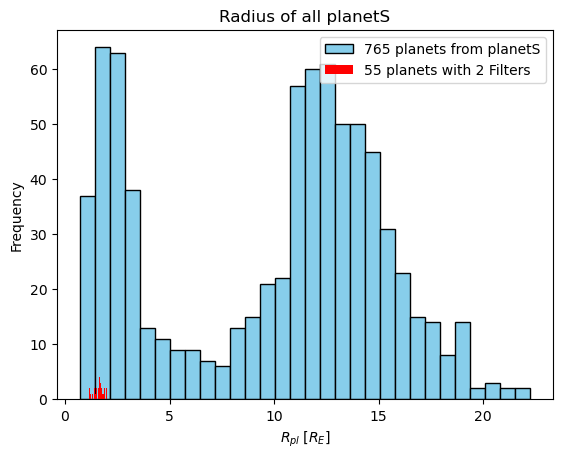

In [227]:
plt.hist(radius_earth_all, bins=30, color='skyblue', edgecolor='black',label='765 planets from planetS')
plt.hist(radius_earth, bins=30, color='red',label='55 planets with 2 Filters')
#plt.hist(radius_up * 10.973, bins=30, color='green', edgecolor='black')

plt.xlabel(r'$R_{pl} \; [R_{E}]$')
plt.ylabel('Frequency')
plt.title('Radius of all planetS')

plt.legend()
 
plt.show()

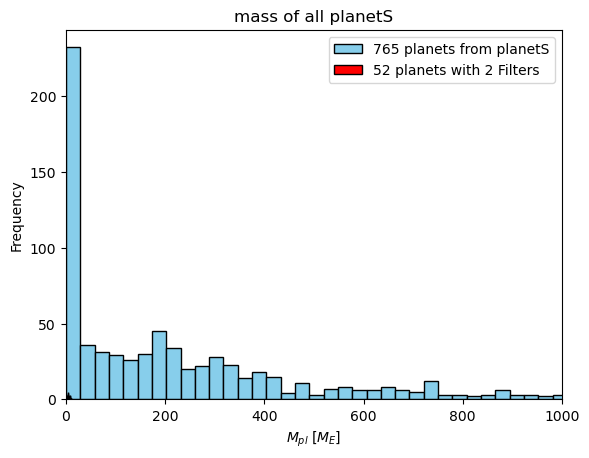

In [229]:
plt.hist(mass_earth_all, bins=300, color='skyblue', edgecolor='black',label='765 planets from planetS')
plt.hist(mass_earth, bins=30, color='red', edgecolor='black',label='52 planets with 2 Filters')
#plt.hist(mass_up * 317.83, bins=30, color='green', edgecolor='black')

plt.xlabel(r'$M_{pl} \; [M_{E}]$')
plt.ylabel('Frequency')
plt.title('mass of all planetS')
plt.xlim(0,1000)

plt.legend()
 
plt.show()

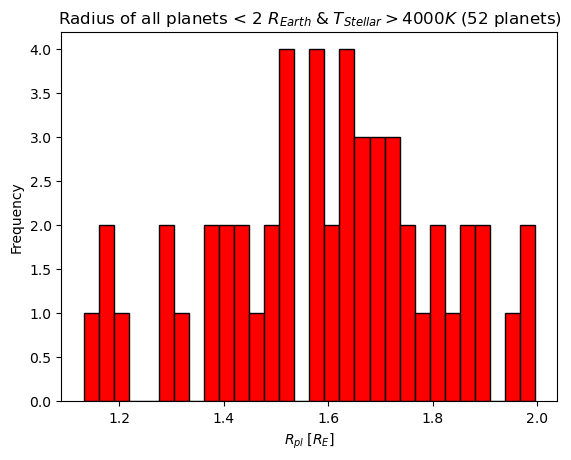

In [231]:
plt.hist(radius_earth, bins=30, color='red', edgecolor='black')
plt.xlabel(r'$R_{pl} \; [R_{E}]$')
plt.ylabel('Frequency')
plt.title('Radius of all planets < 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ (52 planets)')
#plt.hist(radius_up * 10.973, bins=30, color='green', edgecolor='black')
 
plt.show()

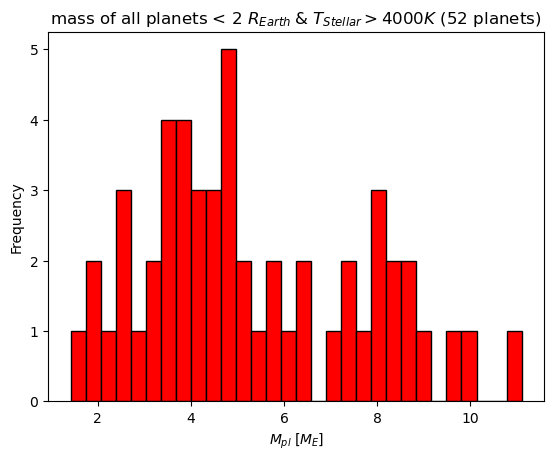

In [232]:
plt.hist(mass_earth, bins=30, color='red', edgecolor='black')

plt.xlabel(r'$M_{pl} \; [M_{E}]$')
plt.ylabel('Frequency')
plt.title('mass of all planets < 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ (52 planets)')
 
plt.show()

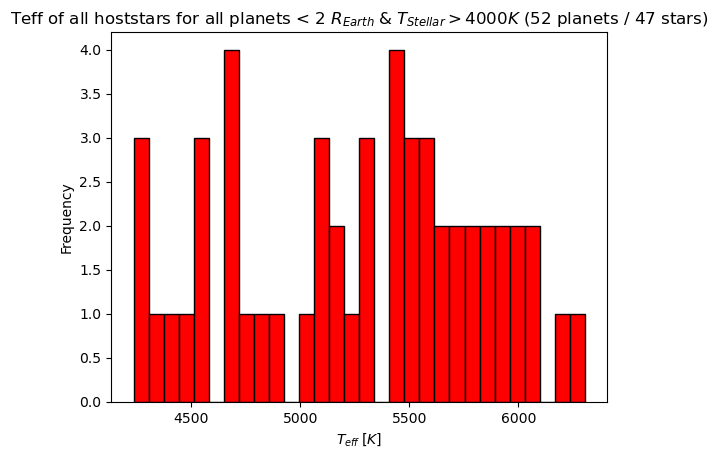

In [233]:
plt.hist(teff, bins=30, color='red', edgecolor='black')
plt.xlabel(r'$T_{eff} \; [K]$')
plt.ylabel('Frequency')
plt.title('Teff of all hoststars for all planets < 2 $R_{Earth} \; & \; T_{Stellar} > 4000 K$ (52 planets / 47 stars)')
plt.show()